In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.datasets import load_digits

seed = 0 

# 載入手寫數字資料集
X_digits, y_digits = load_digits(return_X_y=True)  # 數值特徵：數字類別
X_digits.shape

(1797, 64)

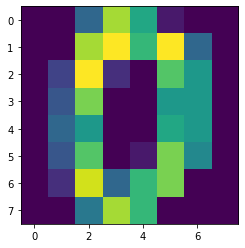

In [2]:
# 顯示數字
from matplotlib.pyplot import imshow
from PIL import Image

imshow(X_digits[0, :].reshape(8,8))

In [3]:
# 特徵標準化
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

data = scale(X_digits)

In [4]:
# 取出資料集的數字類別數
n_digits = len(np.unique(y_digits))
n_samples, n_features = data.shape

print("n_digits: %d, n_samples: %d, n_features: %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, n_samples: 1797, n_features: 64


In [5]:
# 建立兩個 K-Means 模型，除以下參數設定外，其餘為預設值
# #############################################################################
# kmean1: init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed
# kmean2: init='random', n_clusters=n_digits, n_init=10, random_state=seed
# #############################################################################
from sklearn.cluster import KMeans

kmean1 = KMeans(init='k-means++', n_clusters=n_digits, n_init=10, 
                random_state=seed)
kmean2 = KMeans(init='random', n_clusters=n_digits, n_init=10, 
                random_state=seed)

In [6]:
# 利用 PCA 結果建立 K-Means 模型，除以下參數設定外，其餘為預設值
# #############################################################################
# pca: n_components=n_digits, random_state=seed
# kmean3: init=pca.components_, n_clusters=n_digits, n_init=1, random_state=seed
# #############################################################################
from sklearn.decomposition import PCA

pca = PCA(n_components=n_digits, random_state=seed).fit(data)
kmean3 = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1, 
                random_state=seed)

In [7]:
# 分別計算上述三個 K-Means 模型的輪廓係數(Silhouette coefficient)與
# 分類準確率(accuracy)，除以下參數設定外，其餘為預設值
# #############################################################################
# silhouette_score: metric='euclidean'
# #############################################################################
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

lst_name = ['K-Mean (k-means++)', 'K-Means (random)', 'K-Means (PCA-based)']
lst_model = [kmean1, kmean2, kmean3]

for name, model in zip(lst_name, lst_model):
    model.fit(data)
    silhouette = silhouette_score(data, model.labels_, metric='euclidean')
    print('%s: Silhouette=%.4f' % (name, silhouette), end='')
    print(' Accuracy=%.4f' % accuracy_score(y_digits, model.labels_))

K-Mean (k-means++): Silhouette=0.1455 Accuracy=0.1953
K-Means (random): Silhouette=0.1448 Accuracy=0.2816
K-Means (PCA-based): Silhouette=0.1388 Accuracy=0.1085


In [8]:
# 進行 PCA 降維後再做 K-Means，除以下參數設定外，其餘為預設值
# #############################################################################
# kmeans: init='k-means++', n_clusters=n_digits, n_init=10, random_state=seed
# PCA: n_components=2, random_state=seed
# #############################################################################
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10, 
                random_state=seed)
reduced_data = PCA(n_components=2, random_state=seed).fit_transform(data)
kmeans.fit(reduced_data)
print('PCA+KMeans Silhouette=%.4f' % silhouette_score(data, kmeans.labels_, 
                                                        metric='euclidean'), 
                                                        end='')
print(' Accuracy=%.4f' % accuracy_score(y_digits, kmeans.labels_))

PCA+KMeans Silhouette=0.0600 Accuracy=0.1441
